### Key

**Rooms**: Number of rooms

**Price**: Price in dollars

**Method**: S - property sold; SP - property sold prior; PI - property passed in; PN - sold prior not disclosed; SN - sold not disclosed; NB - no bid; VB - vendor bid; W - withdrawn prior to auction; SA - sold after auction; SS - sold after auction price not disclosed. N/A - price or highest bid not available.

**Type**: br - bedroom(s); h - house,cottage,villa, semi,terrace; u - unit, duplex; t - townhouse; dev site - development site; o res - other residential.

**SellerG**: Real Estate Agent

**Date**: Date sold

**Distance**: Distance from CBD

**Regionname**: General Region (West, North West, North, North east …etc)

**Propertycount**: Number of properties that exist in the suburb.

**Bedroom2** : Scraped # of Bedrooms (from different source)

**Bathroom**: Number of Bathrooms

**Car**: Number of carspots

**Landsize**: Land Size

**BuildingArea**: Building Size

**CouncilArea**: Governing council for the area

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("melb_data.csv")

In [3]:
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [4]:
df.shape

(13580, 21)

As we can see above, there are **13,580** rows and **21** columns which accounts to a total of **285,180** values.

There are 21 attributes/features in total.

In [5]:
df.columns.unique()

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

We will use the **info()** method below to gain an initial understanding of the datatypes of each feature.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

In [7]:
df.dtypes.value_counts()

float64    12
object      8
int64       1
dtype: int64

In [8]:
null_df = df.isnull().sum().sort_values(ascending = False)
percent = (df.isnull().sum() / df.isnull().count()).sort_values(ascending = False)*100

null_df = pd.concat([null_df, percent], axis = 1, keys = ['Counts', '% Missing'])
print ('Missing: ')
null_df.head()

Missing: 


,Counts,% Missing
BuildingArea,6450,47.496318
YearBuilt,5375,39.580265
CouncilArea,1369,10.081001
Car,62,0.456554
Suburb,0,0.000000


Dropping the 'Date' and 'Postcode' feature as we will not need them.

In [9]:
df = df.drop(['Date', 'Postcode', 'Address', 'Bedroom2'], axis=1)

In [10]:
df.shape

(13580, 17)

In [11]:
df.head()

,Suburb,Rooms,Type,Price,Method,SellerG,Distance,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,2,h,1480000.0,S,Biggin,2.5,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,2,h,1035000.0,S,Biggin,2.5,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,3,h,1465000.0,SP,Biggin,2.5,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,3,h,850000.0,PI,Biggin,2.5,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,4,h,1600000.0,VB,Nelson,2.5,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


Next we will deal with the missing data.
We will start by seeing the number of missing values in the dataset.

In [12]:
num_missing = df.isna().sum().sort_values(ascending=False)
num_missing = num_missing[num_missing > 0]
percent_missing = num_missing * 100 / df.shape[0]

pd.concat([num_missing, percent_missing], axis=1, 
          keys=['Missing Values', 'Percentage'])

,Missing Values,Percentage
BuildingArea,6450,47.496318
YearBuilt,5375,39.580265
CouncilArea,1369,10.081001
Car,62,0.456554


In [13]:
df = df.drop(['YearBuilt', 'CouncilArea','BuildingArea'], axis=1)

In [14]:
df.head()

,Suburb,Rooms,Type,Price,Method,SellerG,Distance,Bathroom,Car,Landsize,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,2,h,1480000.0,S,Biggin,2.5,1.0,1.0,202.0,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,2,h,1035000.0,S,Biggin,2.5,1.0,0.0,156.0,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,3,h,1465000.0,SP,Biggin,2.5,2.0,0.0,134.0,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,3,h,850000.0,PI,Biggin,2.5,2.0,1.0,94.0,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,4,h,1600000.0,VB,Nelson,2.5,1.0,2.0,120.0,-37.8072,144.9941,Northern Metropolitan,4019.0


In [15]:
df.isnull().sum()

Suburb            0
Rooms             0
Type              0
Price             0
Method            0
SellerG           0
Distance          0
Bathroom          0
Car              62
Landsize          0
Lattitude         0
Longtitude        0
Regionname        0
Propertycount     0
dtype: int64

We will imputate the mean of the car column into the missing values shown above

In [16]:
df['Car'].fillna(np.floor(df['Car'].mean()), inplace=True)

In [17]:
df.isnull().sum()

Suburb           0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Distance         0
Bathroom         0
Car              0
Landsize         0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
dtype: int64

We will next deal with duplicate data and remove them as follows.

In [18]:
df.duplicated().sum()

18

In [19]:
df.drop_duplicates(inplace=True)

In [20]:
df.duplicated().sum()

0

Next we will need to change the features below into integers as they represent counts

In [21]:
integer_columns = ['Rooms', 'Bathroom', 'Car', 'Propertycount']
df[integer_columns] = df[integer_columns].astype(int)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13562 entries, 0 to 13579
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13562 non-null  object 
 1   Rooms          13562 non-null  int32  
 2   Type           13562 non-null  object 
 3   Price          13562 non-null  float64
 4   Method         13562 non-null  object 
 5   SellerG        13562 non-null  object 
 6   Distance       13562 non-null  float64
 7   Bathroom       13562 non-null  int32  
 8   Car            13562 non-null  int32  
 9   Landsize       13562 non-null  float64
 10  Lattitude      13562 non-null  float64
 11  Longtitude     13562 non-null  float64
 12  Regionname     13562 non-null  object 
 13  Propertycount  13562 non-null  int32  
dtypes: float64(5), int32(4), object(5)
memory usage: 1.3+ MB


One last thing to tidy up our dataset is to replace the abbreviated values in 'Type' with something more descriptive

In [23]:
type_mapping = {'h': 'house', 'u': 'unit', 't': 'townhouse'}
df = df.replace({'Type': type_mapping})

In [24]:
region_mapping = {
    'N Metro': 'Northern Metropolitan',
    'S Metro': 'Southern Metropolitan',
    'W Metro': 'Western Metropolitan',
    'E Metro': 'Eastern Metropolitan',
    'SE Metro': 'South-Eastern Metropolitan',
    'N VIC': 'Northern Victoria',
    'W VIC': 'Western Victoria',
    'E VIC': 'Eastern Victoria',
}
df = df.replace({'Regionname': region_mapping})

In [25]:
df['Regionname'].unique()

array(['Northern Metropolitan', 'Western Metropolitan',
       'Southern Metropolitan', 'Eastern Metropolitan',
       'South-Eastern Metropolitan', 'Eastern Victoria',
       'Northern Victoria', 'Western Victoria'], dtype=object)

next we will perform some statistical summary

In [26]:
numerical_features = df.select_dtypes(include=['int32', 'float64']).columns.tolist()
categorical_features = df.select_dtypes(include=['object']).columns.tolist()

In [27]:
numerical_summary = df[numerical_features].describe()
print("Statistical summary of numerical features:\n", numerical_summary)

Statistical summary of numerical features:
               Rooms         Price      Distance      Bathroom           Car  \
count  13562.000000  1.356200e+04  13562.000000  13562.000000  13562.000000   
mean       2.938283  1.075825e+06     10.139198      1.534213      1.607433   
std        0.955748  6.395389e+05      5.864756      0.691933      0.961311   
min        1.000000  8.500000e+04      0.000000      0.000000      0.000000   
25%        2.000000  6.500000e+05      6.125000      1.000000      1.000000   
50%        3.000000  9.027500e+05      9.200000      1.000000      2.000000   
75%        3.000000  1.330000e+06     13.000000      2.000000      2.000000   
max       10.000000  9.000000e+06     48.100000      8.000000     10.000000   

            Landsize     Lattitude    Longtitude  Propertycount  
count   13562.000000  13562.000000  13562.000000   13562.000000  
mean      558.476700    -37.809200    144.995224    7453.049329  
std      3993.270068      0.079216      0.1039

In [28]:
categorical_summary = df[categorical_features].describe(include='object')
print("Statistical summary of categorical features:\n", categorical_summary)

Statistical summary of categorical features:
            Suburb   Type Method SellerG             Regionname
count       13562  13562  13562   13562                  13562
unique        314      3      5     268                      8
top     Reservoir  house      S  Nelson  Southern Metropolitan
freq          358   9439   9016    1559                   4691


In [29]:
numerical_features

['Rooms',
 'Price',
 'Distance',
 'Bathroom',
 'Car',
 'Landsize',
 'Lattitude',
 'Longtitude',
 'Propertycount']

In [30]:
categorical_features

['Suburb', 'Type', 'Method', 'SellerG', 'Regionname']

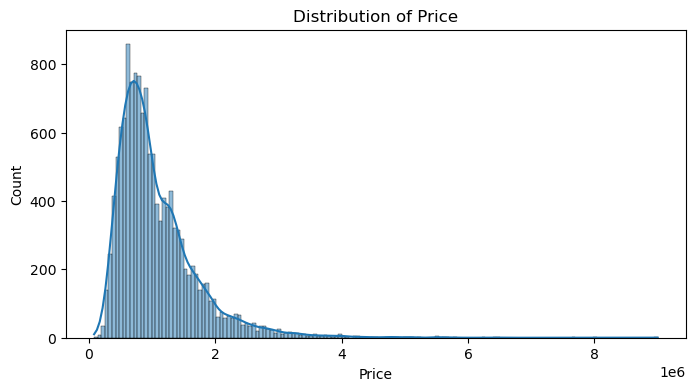

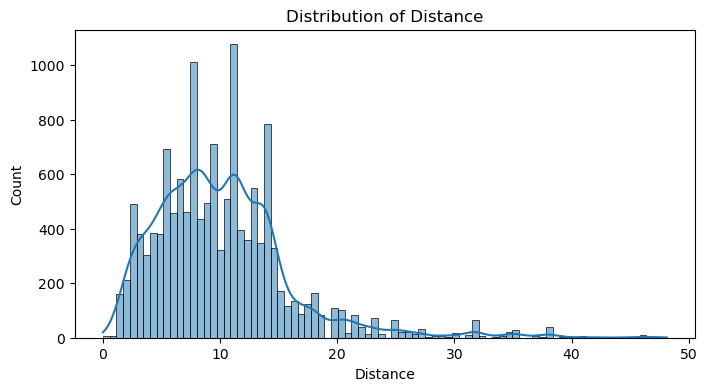

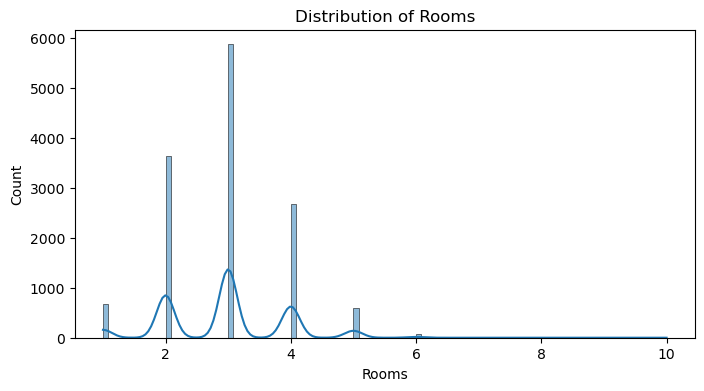

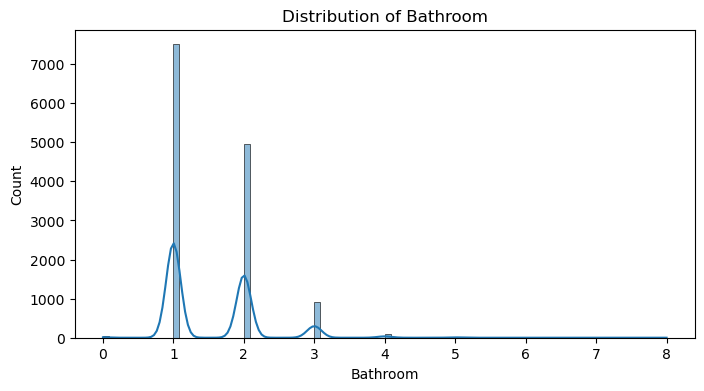

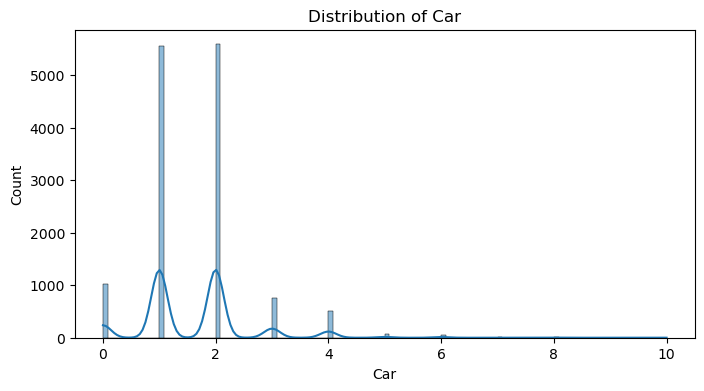

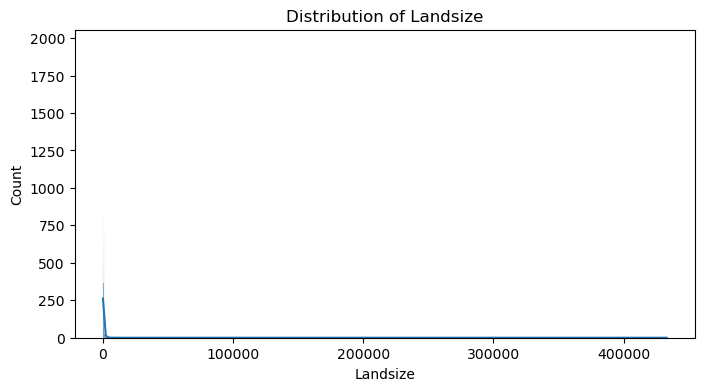

In [31]:
df_numerical = pd.concat([df['Price'], df['Distance'], df['Rooms'], df['Bathroom'],
                          df['Car'], df['Landsize']], axis = 1)
for feature in df_numerical:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()

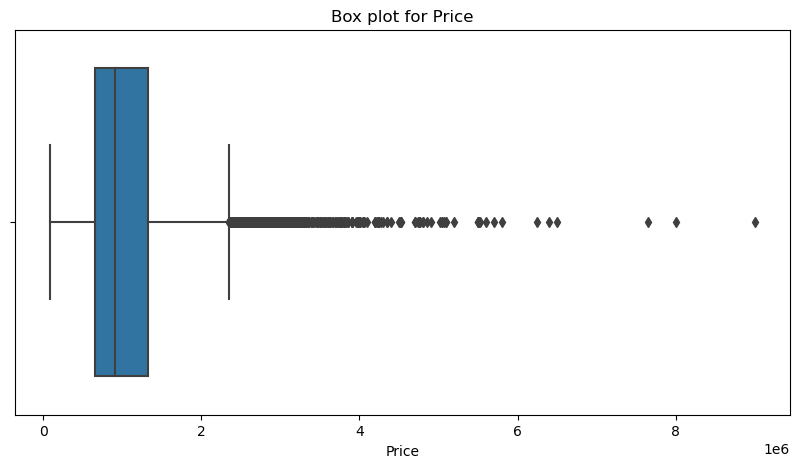

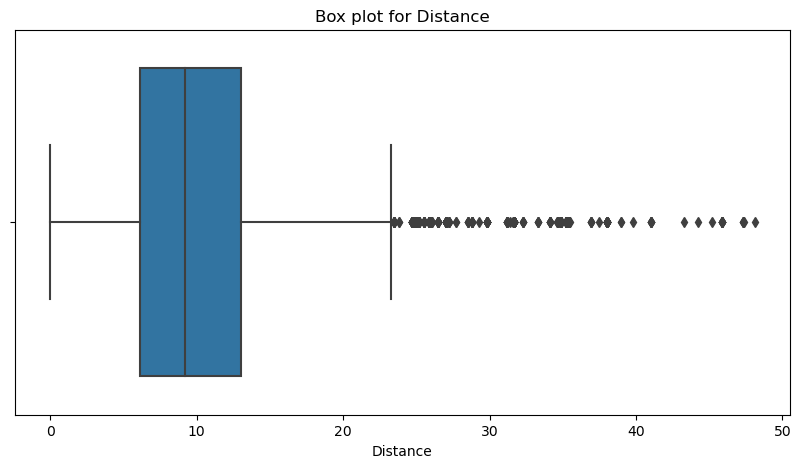

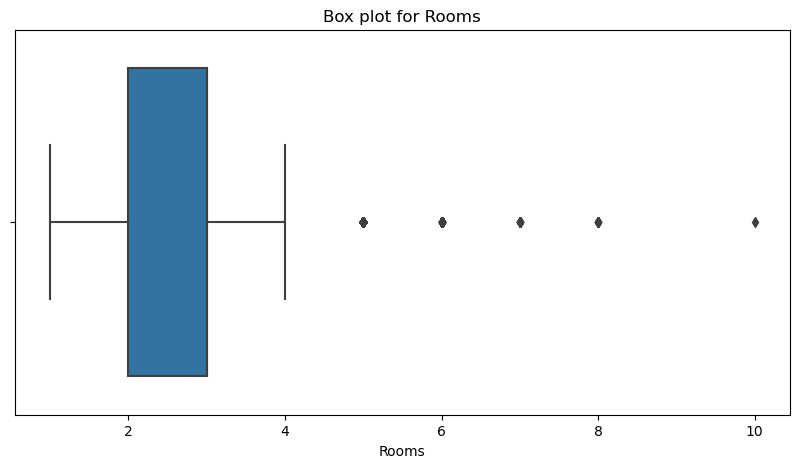

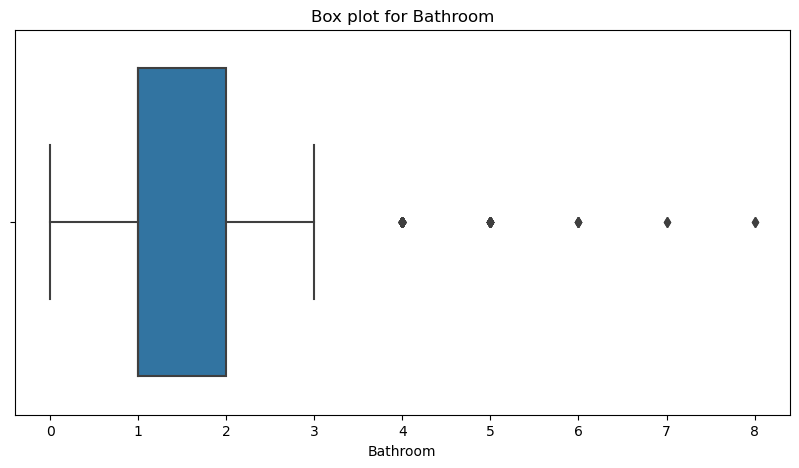

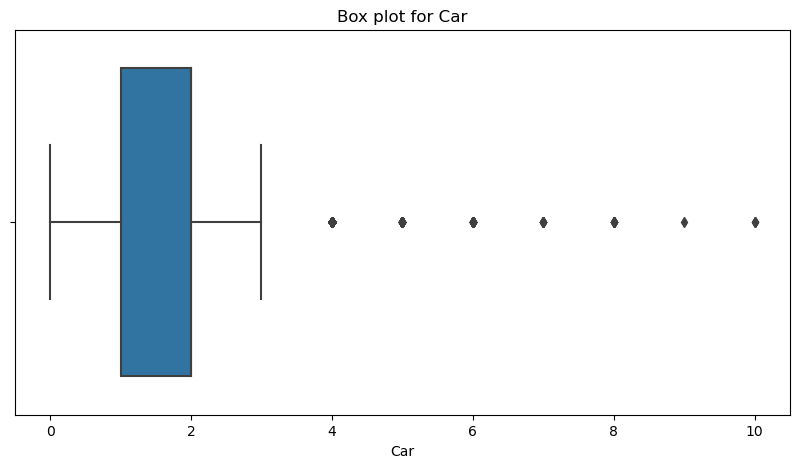

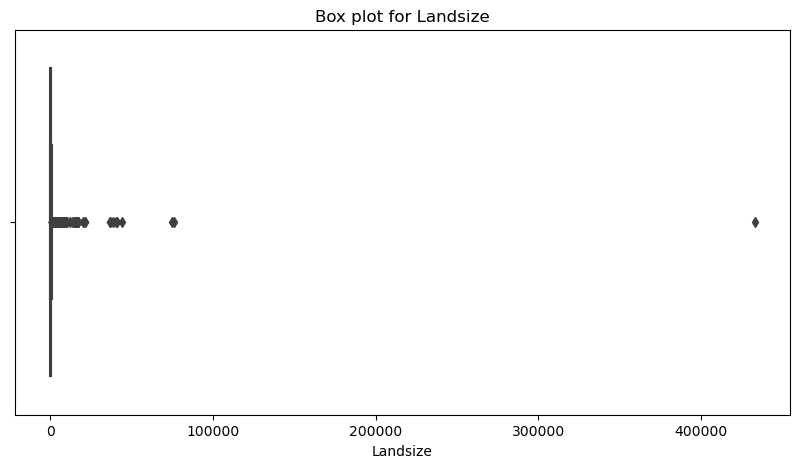

In [32]:
for feature in df_numerical:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=df[feature])
    plt.title(f'Box plot for {feature}')
    plt.show()

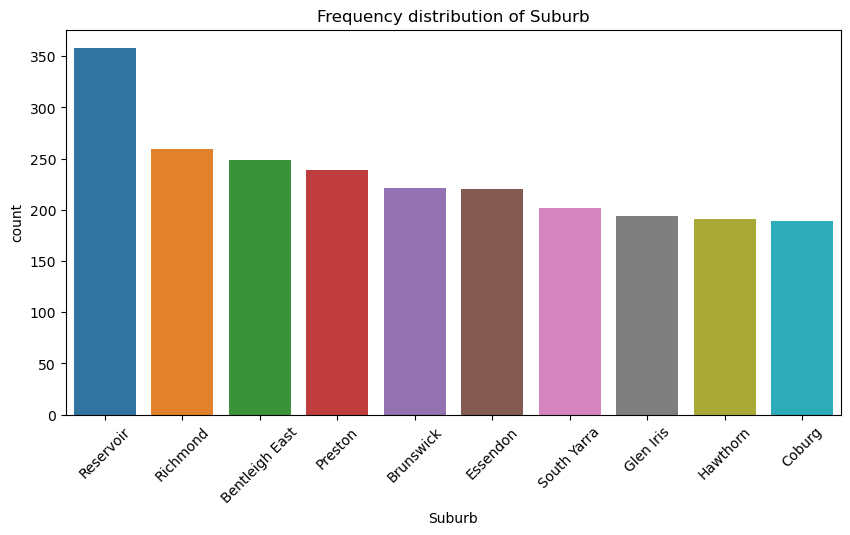

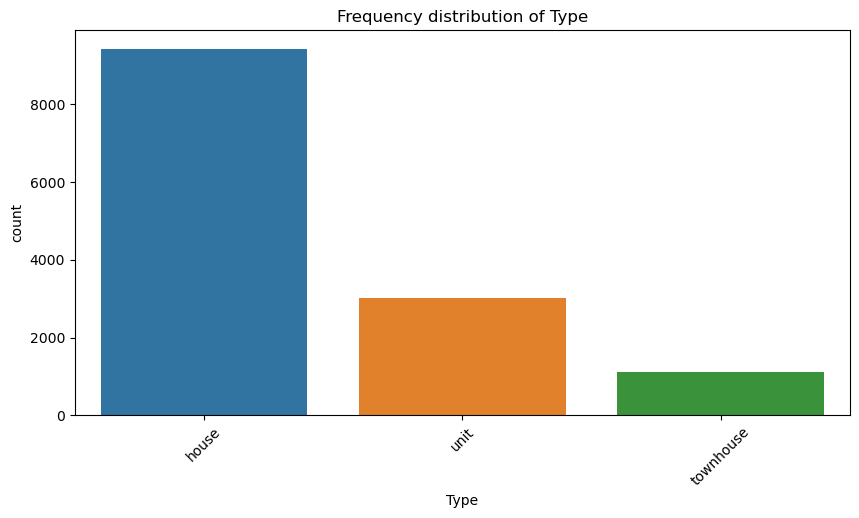

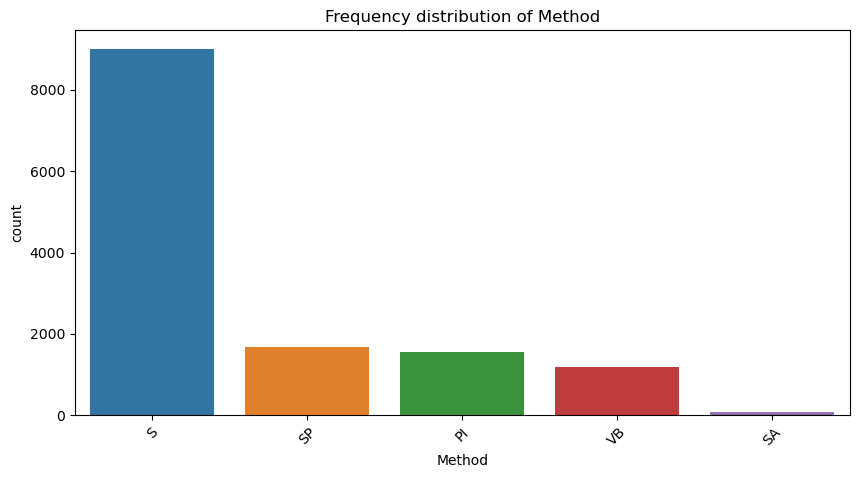

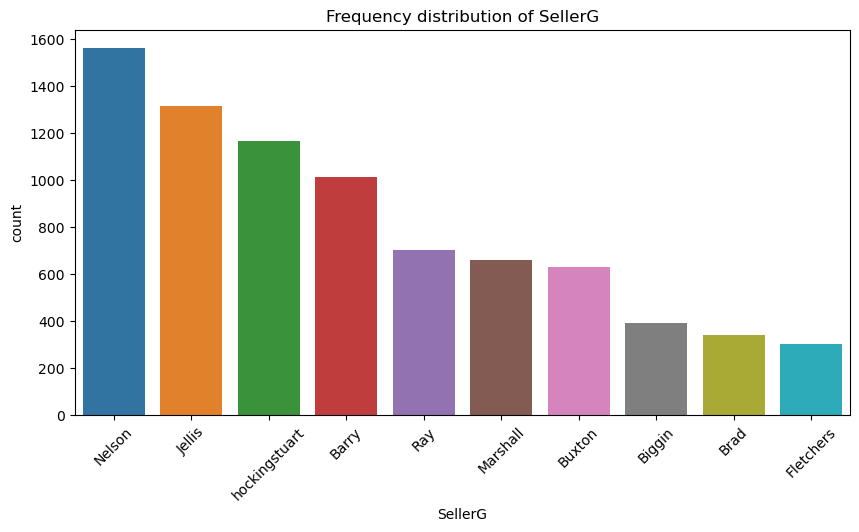

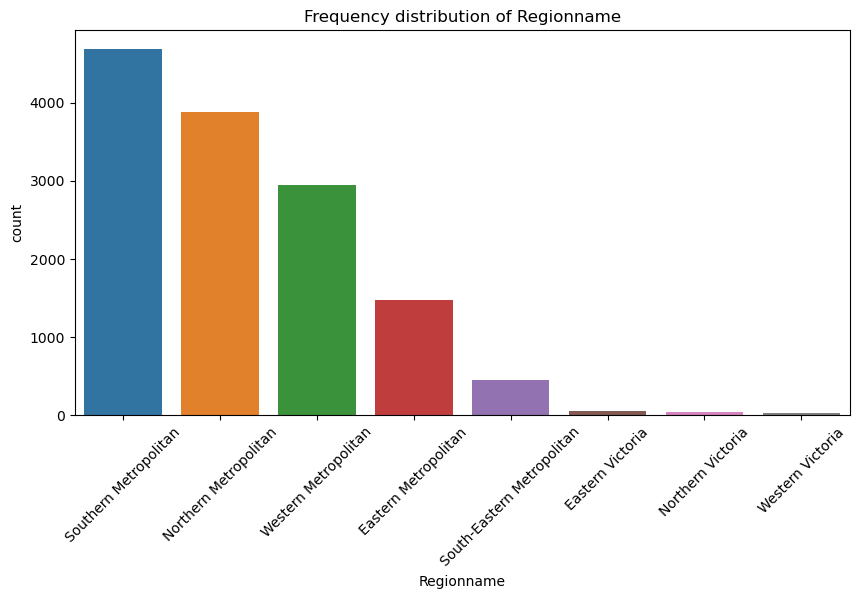

In [33]:
for feature in categorical_features:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=df, x=feature, order=df[feature].value_counts().iloc[:10].index)
    plt.xticks(rotation=45)
    plt.title(f'Frequency distribution of {feature}')
    plt.show()

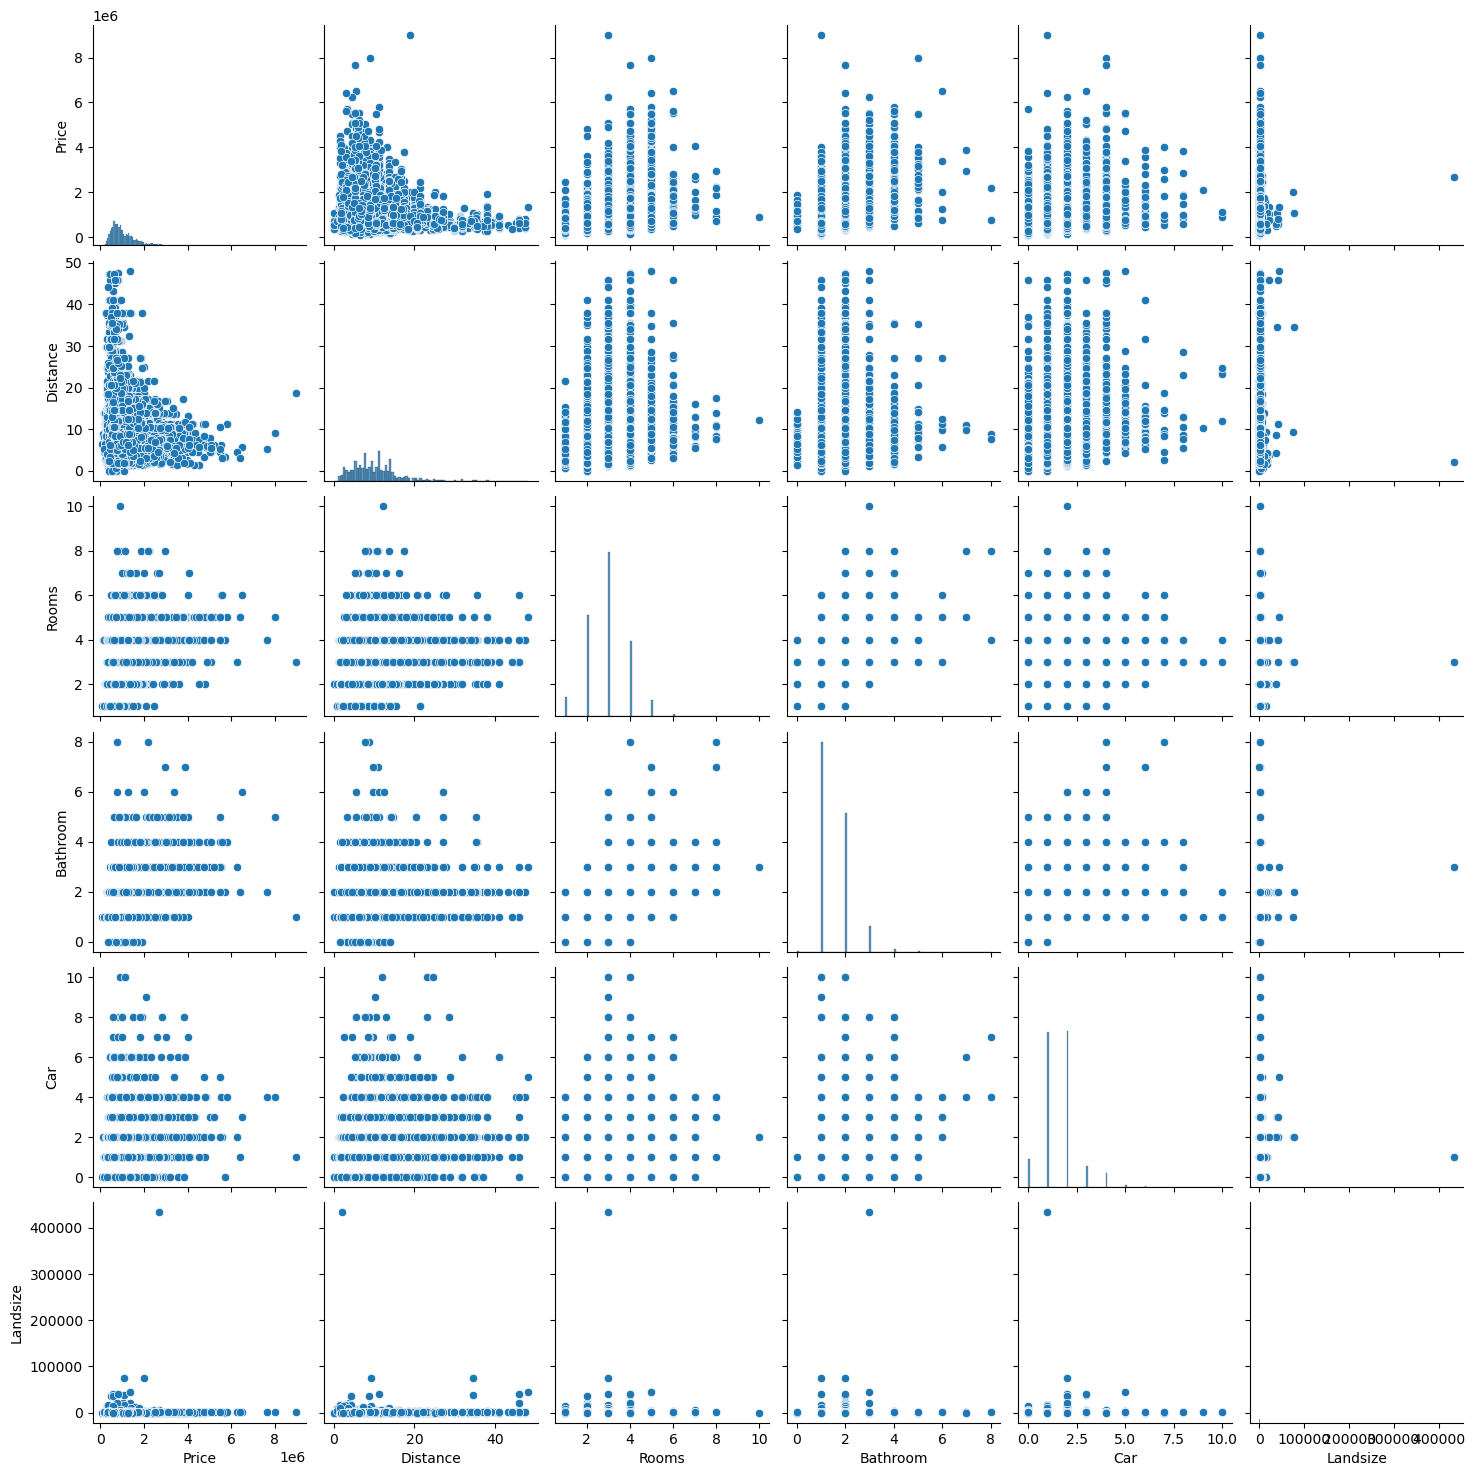

In [34]:
sns.pairplot(df_numerical)
plt.show()

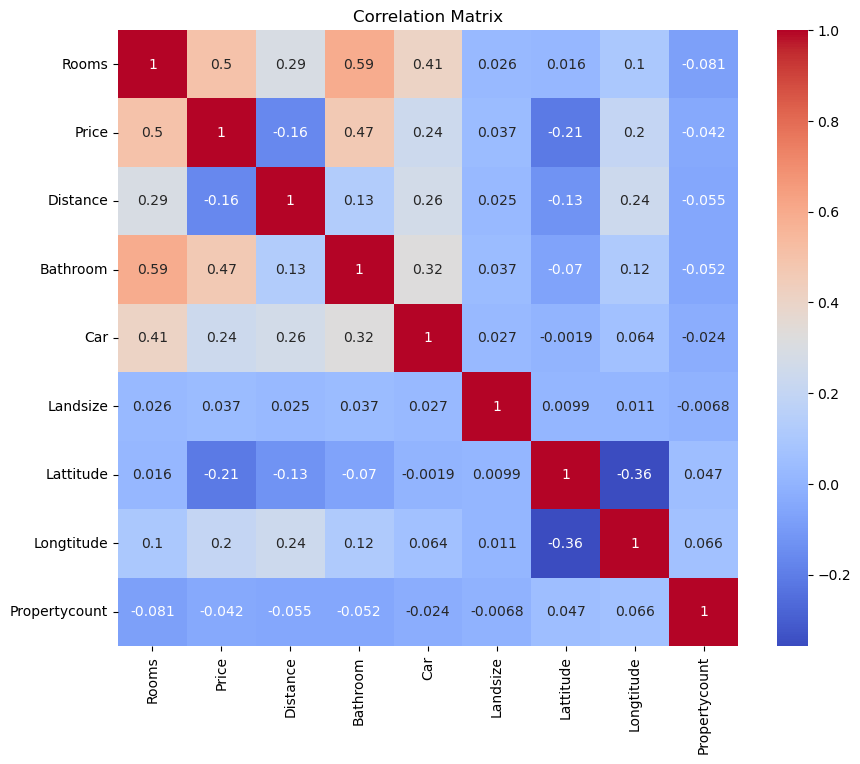

In [35]:
plt.figure(figsize=(10, 8))
sns.heatmap(df[numerical_features].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show() 

In [36]:
df.head()

,Suburb,Rooms,Type,Price,Method,SellerG,Distance,Bathroom,Car,Landsize,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,2,house,1480000.0,S,Biggin,2.5,1,1,202.0,-37.7996,144.9984,Northern Metropolitan,4019
1,Abbotsford,2,house,1035000.0,S,Biggin,2.5,1,0,156.0,-37.8079,144.9934,Northern Metropolitan,4019
2,Abbotsford,3,house,1465000.0,SP,Biggin,2.5,2,0,134.0,-37.8093,144.9944,Northern Metropolitan,4019
3,Abbotsford,3,house,850000.0,PI,Biggin,2.5,2,1,94.0,-37.7969,144.9969,Northern Metropolitan,4019
4,Abbotsford,4,house,1600000.0,VB,Nelson,2.5,1,2,120.0,-37.8072,144.9941,Northern Metropolitan,4019


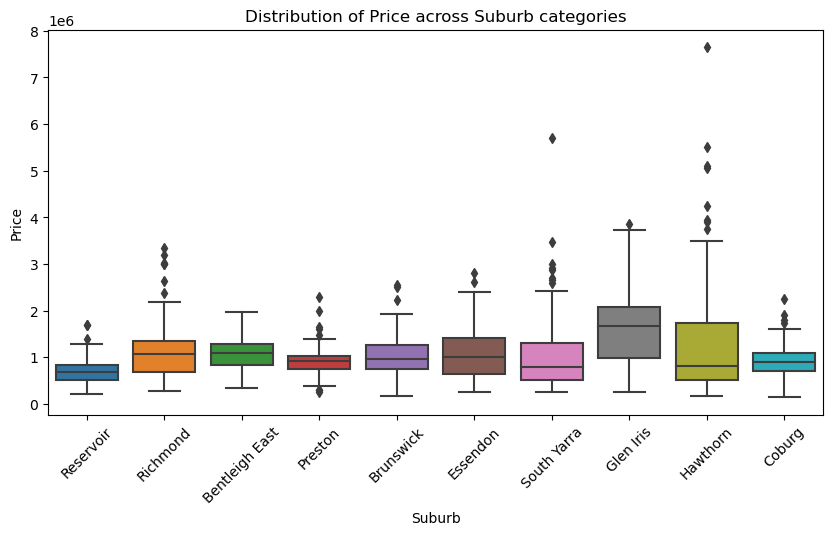

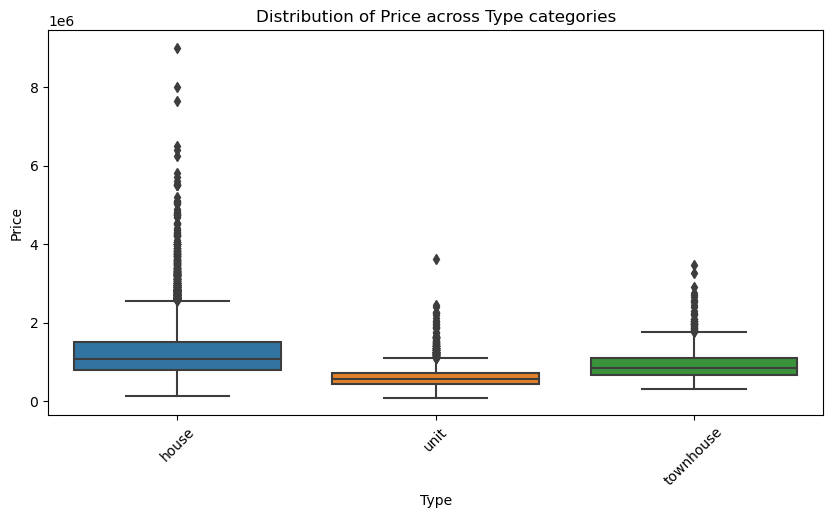

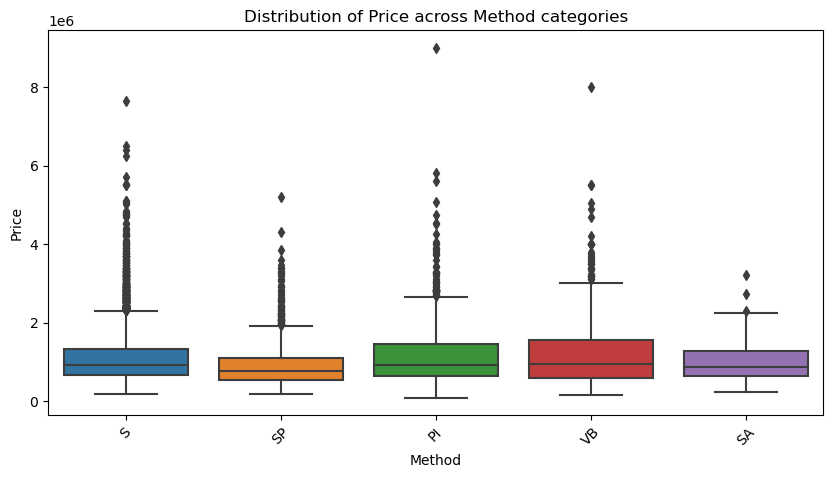

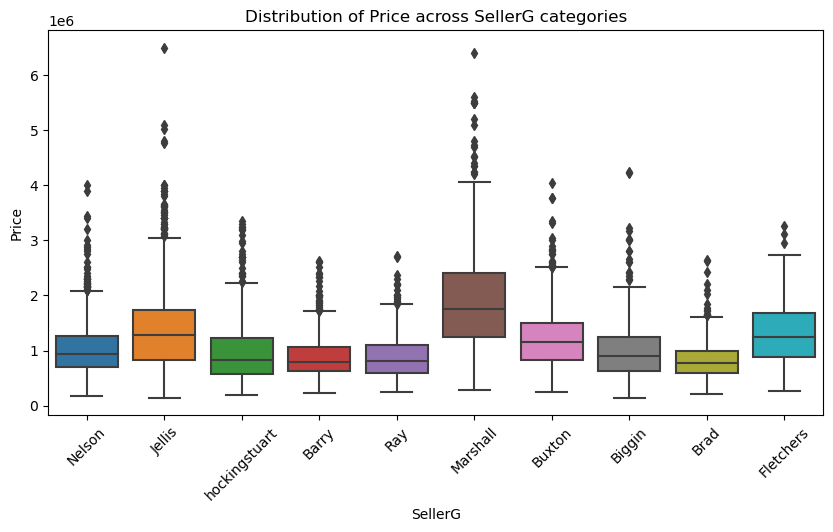

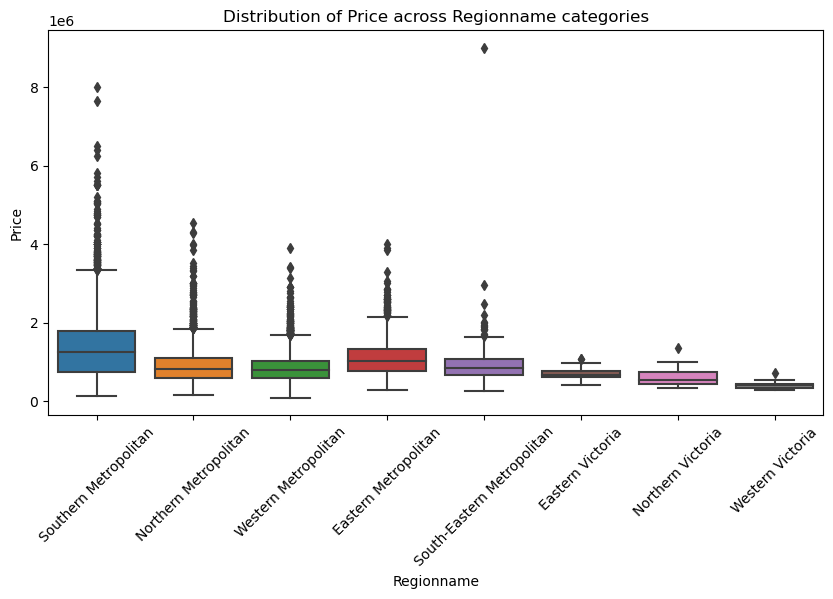

In [37]:
for feature in categorical_features:
    plt.figure(figsize=(10, 5))
    sns.boxplot(data=df, x=feature, y='Price', order=df[feature].value_counts().iloc[:10].index)
    plt.xticks(rotation=45)
    plt.title(f'Distribution of Price across {feature} categories')
    plt.show()

In [38]:
df = df.drop(['Method', 'SellerG'], axis=1)

In [39]:
df.head()

,Suburb,Rooms,Type,Price,Distance,Bathroom,Car,Landsize,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,2,house,1480000.0,2.5,1,1,202.0,-37.7996,144.9984,Northern Metropolitan,4019
1,Abbotsford,2,house,1035000.0,2.5,1,0,156.0,-37.8079,144.9934,Northern Metropolitan,4019
2,Abbotsford,3,house,1465000.0,2.5,2,0,134.0,-37.8093,144.9944,Northern Metropolitan,4019
3,Abbotsford,3,house,850000.0,2.5,2,1,94.0,-37.7969,144.9969,Northern Metropolitan,4019
4,Abbotsford,4,house,1600000.0,2.5,1,2,120.0,-37.8072,144.9941,Northern Metropolitan,4019


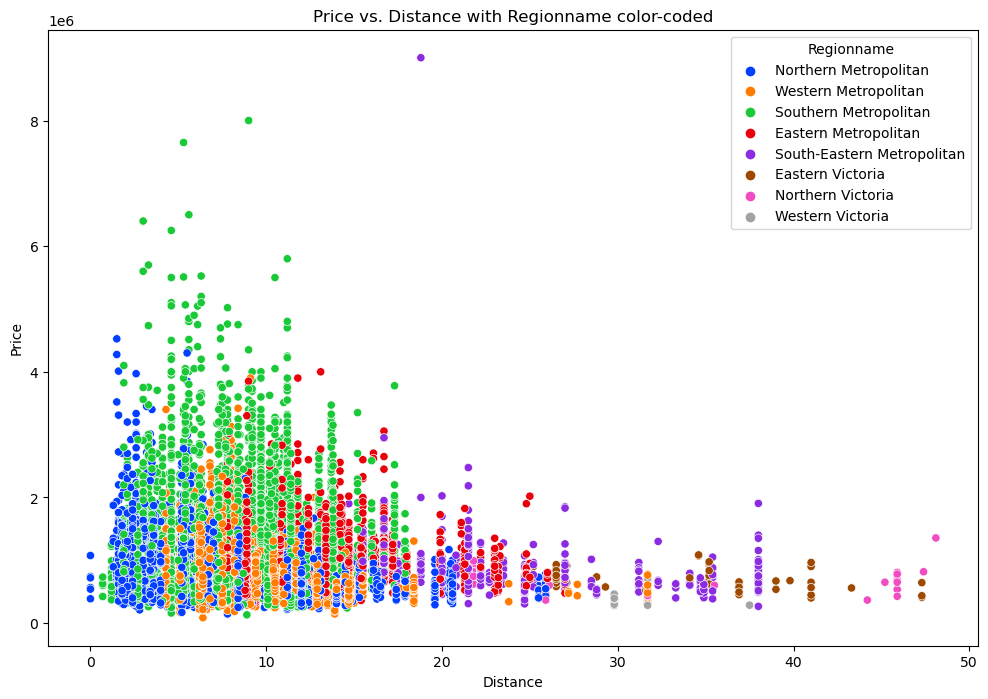

In [40]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='Distance', y='Price', hue='Regionname', palette='bright')
plt.title('Price vs. Distance with Regionname color-coded')
plt.show()

In [41]:
df.head()

,Suburb,Rooms,Type,Price,Distance,Bathroom,Car,Landsize,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,2,house,1480000.0,2.5,1,1,202.0,-37.7996,144.9984,Northern Metropolitan,4019
1,Abbotsford,2,house,1035000.0,2.5,1,0,156.0,-37.8079,144.9934,Northern Metropolitan,4019
2,Abbotsford,3,house,1465000.0,2.5,2,0,134.0,-37.8093,144.9944,Northern Metropolitan,4019
3,Abbotsford,3,house,850000.0,2.5,2,1,94.0,-37.7969,144.9969,Northern Metropolitan,4019
4,Abbotsford,4,house,1600000.0,2.5,1,2,120.0,-37.8072,144.9941,Northern Metropolitan,4019


In [42]:
df.shape

(13562, 12)

In [43]:
df['Price_per_room'] = df['Price'] / df['Rooms']

In [44]:
df['Price_per_landsize'] = df['Price'] / df['Landsize'] 

In [45]:
df.head()

,Suburb,Rooms,Type,Price,Distance,Bathroom,Car,Landsize,Lattitude,Longtitude,Regionname,Propertycount,Price_per_room,Price_per_landsize
0,Abbotsford,2,house,1480000.0,2.5,1,1,202.0,-37.7996,144.9984,Northern Metropolitan,4019,740000.000000,7326.732673
1,Abbotsford,2,house,1035000.0,2.5,1,0,156.0,-37.8079,144.9934,Northern Metropolitan,4019,517500.000000,6634.615385
2,Abbotsford,3,house,1465000.0,2.5,2,0,134.0,-37.8093,144.9944,Northern Metropolitan,4019,488333.333333,10932.835821
3,Abbotsford,3,house,850000.0,2.5,2,1,94.0,-37.7969,144.9969,Northern Metropolitan,4019,283333.333333,9042.553191
4,Abbotsford,4,house,1600000.0,2.5,1,2,120.0,-37.8072,144.9941,Northern Metropolitan,4019,400000.000000,13333.333333


In [46]:
df.Price_per_landsize.describe()

count    1.356200e+04
mean              inf
std               NaN
min      6.235364e+00
25%      1.536467e+03
50%      2.756440e+03
75%      5.778455e+03
max               inf
Name: Price_per_landsize, dtype: float64

we can see we might have a zero value so we will need to find it and drop that row

In [47]:
zero_landsize_rows = df[df['Landsize'] == 0]
print(zero_landsize_rows)
df = df[df['Landsize'] != 0]

             Suburb  Rooms       Type      Price  Distance  Bathroom  Car  \
8        Abbotsford      1       unit   300000.0       2.5         1    1   
10       Abbotsford      2       unit   700000.0       2.5         2    1   
12       Abbotsford      2       unit   750000.0       2.5         2    1   
14       Abbotsford      1       unit   441000.0       2.5         1    1   
21       Abbotsford      3  townhouse   900000.0       2.5         2    2   
...             ...    ...        ...        ...       ...       ...  ...   
12168      St Kilda      2       unit   600000.0       5.0         1    1   
12176  Surrey Hills      3       unit  1050000.0      10.2         2    2   
12188   Tullamarine      2       unit   300000.0      12.9         1    1   
12207  Williamstown      1       unit   385000.0       6.8         1    1   
12209       Windsor      2       unit   560000.0       4.6         1    1   

       Landsize  Lattitude  Longtitude             Regionname  Propertycoun

In [48]:
df.shape

(11625, 14)

In [49]:
df.Price_per_landsize.describe()

count     11625.000000
mean       3365.696139
std       10071.082227
min           6.235364
25%        1386.639676
50%        2364.406780
75%        3964.497041
max      710000.000000
Name: Price_per_landsize, dtype: float64

In [50]:
df.Price_per_room.describe()

count    1.162500e+04
mean     3.772561e+05
std      1.865070e+05
min      3.275000e+04
25%      2.486667e+05
50%      3.350000e+05
75%      4.583333e+05
max      3.000000e+06
Name: Price_per_room, dtype: float64

In [51]:
def find_outliers_iqr(df, column_name):
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[column_name] < lower_bound) | (df[column_name] > upper_bound)]
    return outliers

price_per_room_outliers = find_outliers_iqr(df, 'Price_per_room')
price_per_landsize_outliers = find_outliers_iqr(df, 'Price_per_landsize')


In [52]:
len(price_per_room_outliers)

406

In [53]:
len(price_per_landsize_outliers)

732

In [54]:
outlier_indices = price_per_room_outliers.index.union(price_per_landsize_outliers.index)

In [55]:
len(outlier_indices)

1034

In [56]:
df.drop(outlier_indices, inplace=True)

In [57]:
df.shape

(10591, 14)

In [58]:
def find_outliers_iqr(df, column_name):
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[column_name] < lower_bound) | (df[column_name] > upper_bound)]
    return outliers

bathroom_outliers = find_outliers_iqr(df, 'Bathroom')
rooms_outliers = find_outliers_iqr(df, 'Rooms')

In [59]:
len(bathroom_outliers)

113

In [60]:
len(rooms_outliers)

276

In [61]:
outlier_indices_rooms_bathrooms = rooms_outliers.index.union(bathroom_outliers.index)

In [62]:
len(outlier_indices_rooms_bathrooms)

375

In [63]:
df.drop(outlier_indices_rooms_bathrooms, inplace=True)

In [64]:
df.shape

(10216, 14)

In [65]:
zero_bathroom_rows = df[df['Bathroom'] == 0]
print(zero_bathroom_rows)
len(zero_bathroom_rows)

               Suburb  Rooms       Type      Price  Distance  Bathroom  Car  \
139        Alphington      3      house  1485000.0       6.4         0    0   
584            Balwyn      2      house  1010000.0       9.7         0    0   
913    Bentleigh East      3      house   700000.0      13.9         0    0   
1593       Camberwell      4      house  1400000.0       7.8         0    0   
2777        Glen Iris      2      house   845000.0       9.2         0    0   
2797        Glen Iris      4      house  1550000.0       9.2         0    0   
4880          Preston      4      house  1004000.0       8.8         0    0   
6671       Yarraville      2      house   610000.0       7.0         0    0   
6938          Fawkner      3       unit   470000.0      12.4         0    0   
7494     Balwyn North      3      house  1670000.0       9.2         0    0   
8010          Ivanhoe      3  townhouse  1060000.0       7.9         0    0   
8271          Preston      3      house  1010000.0  

15

In [66]:
zero_rooms_rows = df[df['Rooms'] == 0]
print(zero_rooms_rows)
len(zero_rooms_rows)

Empty DataFrame
Columns: [Suburb, Rooms, Type, Price, Distance, Bathroom, Car, Landsize, Lattitude, Longtitude, Regionname, Propertycount, Price_per_room, Price_per_landsize]
Index: []


0

In [67]:
df = df[df['Bathroom'] != 0]

In [68]:
df.shape

(10201, 14)

In [69]:
def find_outliers_iqr(df, column_name):
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[column_name] < lower_bound) | (df[column_name] > upper_bound)]
    return outliers

landsize_outliers = find_outliers_iqr(df, 'Landsize')

In [70]:
len(landsize_outliers)

325

In [71]:
df.drop(landsize_outliers.index, inplace=True)

In [72]:
df.shape

(9876, 14)

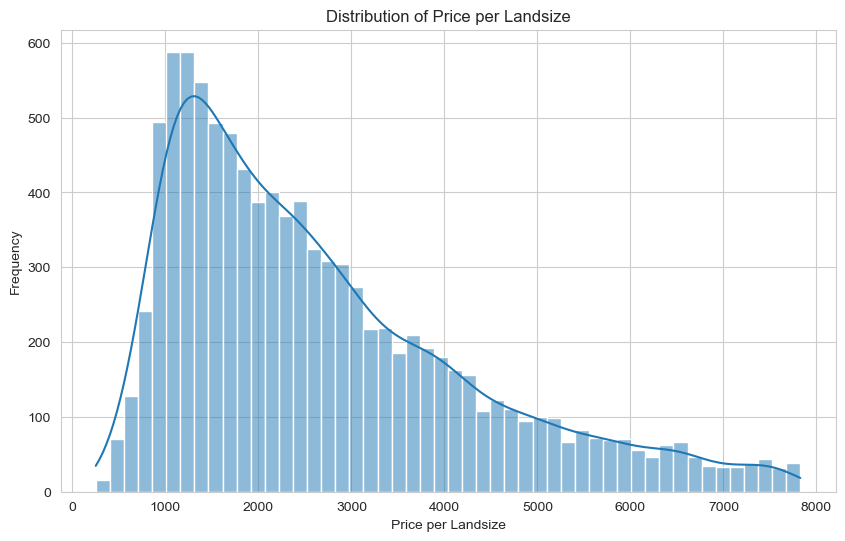

In [73]:
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Price_per_landsize', bins=50, kde=True)
plt.title('Distribution of Price per Landsize')
plt.xlabel('Price per Landsize')
plt.ylabel('Frequency')
plt.show()

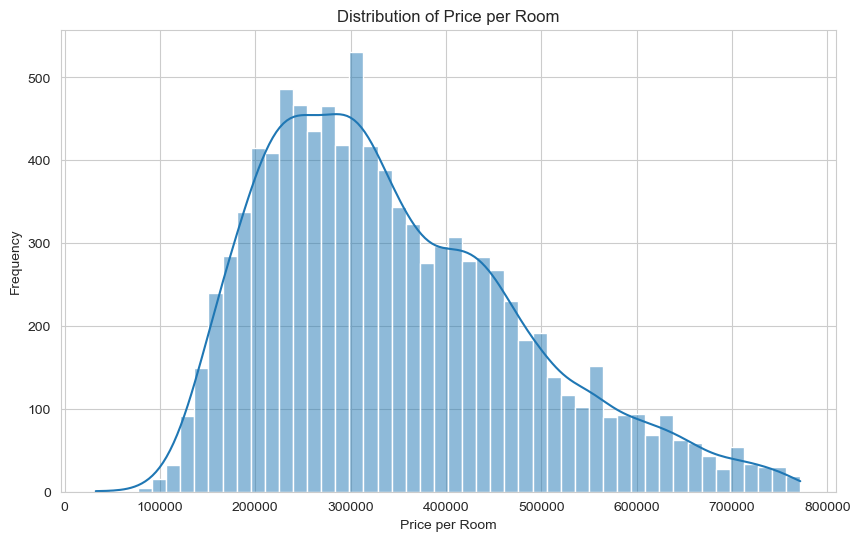

In [74]:
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Price_per_room', bins=50, kde=True)
plt.title('Distribution of Price per Room')
plt.xlabel('Price per Room')
plt.ylabel('Frequency')
plt.show()

In [75]:
low_landsize = df[(df['Landsize'] >10000) ]
print(low_landsize)
len(low_landsize)

Empty DataFrame
Columns: [Suburb, Rooms, Type, Price, Distance, Bathroom, Car, Landsize, Lattitude, Longtitude, Regionname, Propertycount, Price_per_room, Price_per_landsize]
Index: []


0

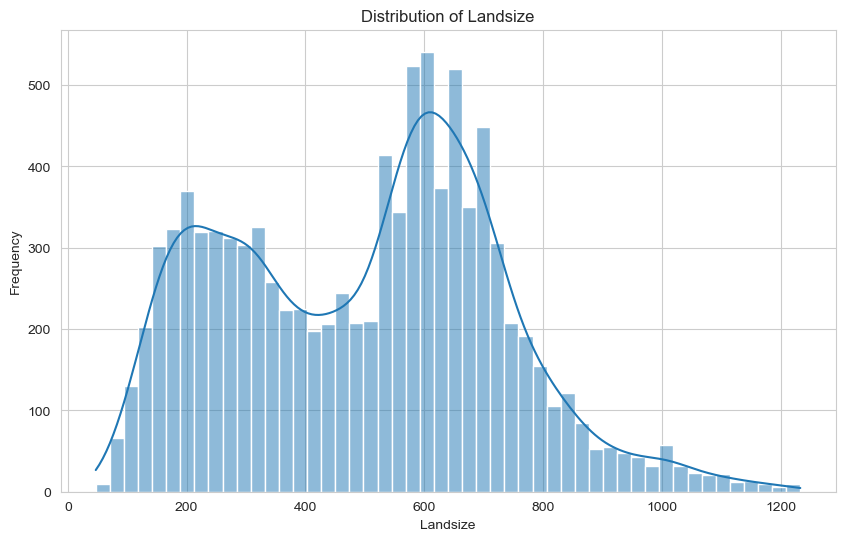

In [76]:
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Landsize', bins=50, kde=True)
plt.title('Distribution of Landsize')
plt.xlabel('Landsize')
plt.ylabel('Frequency')
plt.show()

In [77]:
df.head()

,Suburb,Rooms,Type,Price,Distance,Bathroom,Car,Landsize,Lattitude,Longtitude,Regionname,Propertycount,Price_per_room,Price_per_landsize
0,Abbotsford,2,house,1480000.0,2.5,1,1,202.0,-37.7996,144.9984,Northern Metropolitan,4019,740000.000000,7326.732673
1,Abbotsford,2,house,1035000.0,2.5,1,0,156.0,-37.8079,144.9934,Northern Metropolitan,4019,517500.000000,6634.615385
5,Abbotsford,2,house,941000.0,2.5,1,0,181.0,-37.8041,144.9953,Northern Metropolitan,4019,470500.000000,5198.895028
6,Abbotsford,3,house,1876000.0,2.5,2,0,245.0,-37.8024,144.9993,Northern Metropolitan,4019,625333.333333,7657.142857
9,Abbotsford,2,house,1097000.0,2.5,1,2,220.0,-37.8010,144.9989,Northern Metropolitan,4019,548500.000000,4986.363636


In [78]:
df.shape

(9876, 14)

In [79]:
df = df.drop(['Lattitude', 'Longtitude', 'Propertycount', 'Price_per_landsize', 'Price_per_room'], axis=1)


In [80]:
df.head(10)

,Suburb,Rooms,Type,Price,Distance,Bathroom,Car,Landsize,Regionname
0,Abbotsford,2,house,1480000.0,2.5,1,1,202.0,Northern Metropolitan
1,Abbotsford,2,house,1035000.0,2.5,1,0,156.0,Northern Metropolitan
5,Abbotsford,2,house,941000.0,2.5,1,0,181.0,Northern Metropolitan
6,Abbotsford,3,house,1876000.0,2.5,2,0,245.0,Northern Metropolitan
9,Abbotsford,2,house,1097000.0,2.5,1,2,220.0,Northern Metropolitan
11,Abbotsford,3,house,1350000.0,2.5,2,2,214.0,Northern Metropolitan
13,Abbotsford,2,house,1172500.0,2.5,1,1,195.0,Northern Metropolitan
15,Abbotsford,2,house,1310000.0,2.5,1,2,238.0,Northern Metropolitan
18,Abbotsford,3,house,955000.0,2.5,1,0,183.0,Northern Metropolitan
19,Abbotsford,2,house,890000.0,2.5,1,1,150.0,Northern Metropolitan


In [81]:
df.describe()

,Rooms,Price,Distance,Bathroom,Car,Landsize
count,9876.000000,9.876000e+03,9876.000000,9876.000000,9876.000000,9876.000000
mean,3.146517,1.072488e+06,11.432675,1.546375,1.735419,497.987647
std,0.783952,4.980088e+05,5.701991,0.627453,0.963730,230.232176
min,2.000000,1.310000e+05,0.000000,1.000000,0.000000,47.000000
25%,3.000000,7.100000e+05,7.800000,1.000000,1.000000,295.000000
50%,3.000000,9.415000e+05,11.000000,1.000000,2.000000,534.000000
75%,4.000000,1.323500e+06,13.800000,2.000000,2.000000,660.000000
max,5.000000,3.751000e+06,47.300000,3.000000,10.000000,1233.000000


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9876 entries, 0 to 13579
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Suburb      9876 non-null   object 
 1   Rooms       9876 non-null   int32  
 2   Type        9876 non-null   object 
 3   Price       9876 non-null   float64
 4   Distance    9876 non-null   float64
 5   Bathroom    9876 non-null   int32  
 6   Car         9876 non-null   int32  
 7   Landsize    9876 non-null   float64
 8   Regionname  9876 non-null   object 
dtypes: float64(3), int32(3), object(3)
memory usage: 655.8+ KB


In [83]:
len(df.Suburb.unique())

306

In [84]:
suburb_counts = df['Suburb'].value_counts()
other_suburbs = suburb_counts[suburb_counts < 10].index
df['Suburb'] = df['Suburb'].replace(other_suburbs, 'Other')

In [85]:
len(other_suburbs)

109

In [86]:
len(df.Suburb.unique())

198

In [87]:
df.Type.unique()

array(['house', 'townhouse', 'unit'], dtype=object)

In [88]:
columns_to_encode = ['Suburb', 'Type', 'Regionname']
df = pd.get_dummies(df, columns=columns_to_encode, drop_first=True)

In [89]:
df.head()

,Rooms,Price,Distance,Bathroom,Car,Landsize,Suburb_Aberfeldie,Suburb_Airport West,Suburb_Albion,Suburb_Alphington,...,Suburb_Yarraville,Type_townhouse,Type_unit,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria
0,2,1480000.0,2.5,1,1,202.0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,2,1035000.0,2.5,1,0,156.0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
5,2,941000.0,2.5,1,0,181.0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
6,3,1876000.0,2.5,2,0,245.0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
9,2,1097000.0,2.5,1,2,220.0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [90]:
df.shape

(9876, 212)

In [91]:
from sklearn.preprocessing import StandardScaler

# List of numerical features to standardize, excluding 'Price'
numerical_features = ['Rooms', 'Distance', 'Bathroom', 'Car', 'Landsize'] 

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the numerical features and transform them
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# Display the standardized DataFrame
print(df.head())


      Rooms      Price  Distance  Bathroom       Car  Landsize  \
0 -1.462557  1480000.0 -1.566668 -0.870827 -0.763136 -1.285670   
1 -1.462557  1035000.0 -1.566668 -0.870827 -1.800824 -1.485479   
5 -1.462557   941000.0 -1.566668 -0.870827 -1.800824 -1.376887   
6 -0.186905  1876000.0 -1.566668  0.722999 -1.800824 -1.098893   
9 -1.462557  1097000.0 -1.566668 -0.870827  0.274552 -1.207484   

   Suburb_Aberfeldie  Suburb_Airport West  Suburb_Albion  Suburb_Alphington  \
0                  0                    0              0                  0   
1                  0                    0              0                  0   
5                  0                    0              0                  0   
6                  0                    0              0                  0   
9                  0                    0              0                  0   

   ...  Suburb_Yarraville  Type_townhouse  Type_unit  \
0  ...                  0               0          0   
1  ...          

In [92]:
from sklearn.model_selection import train_test_split

# Separate the features (X) and the target variable (y)
X = df.drop('Price', axis=1)
y = df['Price']

# Split the dataset into a training set (80%) and a testing set (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [93]:
from sklearn.model_selection import GridSearchCV, ShuffleSplit
from sklearn.metrics import mean_absolute_error

In [94]:
# Create an empty dictionary to store the MAE scores for all the models
mae_scores = {}

In [95]:
""""
from sklearn.linear_model import ElasticNet

# 1. Choose an algorithm 
algorithm = ElasticNet(random_state=42)

# 2. Search for an effective parameter combination
param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1, 10, 100],
    'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9],
}

# Create a ShuffleSplit instance for cross-validation
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=42)

grid_search = GridSearchCV(algorithm, param_grid, scoring='neg_mean_absolute_error', cv=cv)
grid_search.fit(X_train, y_train)

# 3. Create a model using the found parameters
best_params = grid_search.best_params_
print("Best parameters for Elastic Net:")
print(best_params) 
elastic_net_model = ElasticNet(alpha=best_params['alpha'], l1_ratio=best_params['l1_ratio'], random_state=42)

# 4. Train (fit) the model on the training dataset
elastic_net_model.fit(X_train, y_train)

# 5. Test the model on the test dataset and get the results
y_pred = elastic_net_model.predict(X_test)
elastic_net_mae = mean_absolute_error(y_test, y_pred)
print("Elastic Net MAE =", elastic_net_mae)

# Store the Elastic Net MAE in the dictionary
mae_scores['Elastic Net'] = elastic_net_mae
""""

KeyboardInterrupt: 

In [ ]:
""""
from sklearn.linear_model import Ridge

algorithm = Ridge(random_state=42)

param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1, 10, 100],
    'normalize': [True, False],
    'fit_intercept': [True, False],
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga'],
    'max_iter': [100, 500, 1000, 2000],
}

cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=42)

grid_search = GridSearchCV(algorithm, param_grid, scoring='neg_mean_absolute_error', cv=cv)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best parameters for Ridge:")
print(best_params) 
ridge_model = Ridge(alpha=best_params['alpha'], normalize=best_params['normalize'], fit_intercept=best_params['fit_intercept'], solver=best_params['solver'], max_iter=best_params['max_iter'], random_state=42)

ridge_model.fit(X_train, y_train)

y_pred = ridge_model.predict(X_test)
ridge_mae = mean_absolute_error(y_test, y_pred)
print("Ridge MAE =", ridge_mae)

mae_scores['Ridge'] = ridge_mae
""""

In [ ]:
""""
from sklearn.linear_model import Ridge

algorithm = Ridge(random_state=42)

param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1, 10, 100],
    'normalize': [True, False],
    'fit_intercept': [True, False],
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga'],
}

cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=42)

grid_search = GridSearchCV(algorithm, param_grid, scoring='neg_mean_absolute_error', cv=cv)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best parameters for Ridge:")
print(best_params) 
ridge_model = Ridge(alpha=best_params['alpha'], normalize=best_params['normalize'], 
                    fit_intercept=best_params['fit_intercept'], solver=best_params['solver'], 
                    random_state=42)

ridge_model.fit(X_train, y_train)

y_pred = ridge_model.predict(X_test)
ridge_mae = mean_absolute_error(y_test, y_pred)
print("Ridge MAE =", ridge_mae)

mae_scores['Ridge'] = ridge_mae
""""

In [ ]:
""""
from sklearn.neighbors import KNeighborsRegressor

algorithm = KNeighborsRegressor()

param_grid = {
    'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski'],
}

cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=42)

grid_search = GridSearchCV(algorithm, param_grid, scoring='neg_mean_absolute_error', cv=cv)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best parameters for K-Nearest Neighbors:")
print(best_params) 
knn_model = KNeighborsRegressor(n_neighbors=best_params['n_neighbors'], 
                                weights=best_params['weights'],
                                metric=best_params['metric'])

knn_model.fit(X_train, y_train)

y_pred = knn_model.predict(X_test)
knn_mae = mean_absolute_error(y_test, y_pred)
print("K-Nearest Neighbors MAE =", knn_mae)

mae_scores['K-Nearest Neighbors'] = knn_mae
""""

In [ ]:
""""
from sklearn.tree import DecisionTreeRegressor

algorithm = DecisionTreeRegressor(random_state=42)

param_grid = {
    'max_depth': [None, 1, 3, 5, 7, 9],
    'min_samples_split': [2, 5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 4, 6, 8],
    'max_features': [None, 'auto', 'sqrt', 'log2'],
}

cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=42)

grid_search = GridSearchCV(algorithm, param_grid, scoring='neg_mean_absolute_error', cv=cv)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best parameters for Decision Tree:")
print(best_params)
decision_tree_model = DecisionTreeRegressor(max_depth=best_params['max_depth'],
                                            min_samples_split=best_params['min_samples_split'],
                                            min_samples_leaf=best_params['min_samples_leaf'],
                                            max_features=best_params['max_features'],
                                            random_state=42)

decision_tree_model.fit(X_train, y_train)

y_pred = decision_tree_model.predict(X_test)
decision_tree_mae = mean_absolute_error(y_test, y_pred)
print("Decision Tree MAE =", decision_tree_mae)

mae_scores['Decision Tree'] = decision_tree_mae
""""

In [ ]:
""""
from sklearn.neural_network import MLPRegressor

algorithm = MLPRegressor(random_state=42)

param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'lbfgs'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'adaptive'],
}

cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=42)

grid_search = GridSearchCV(algorithm, param_grid, scoring='neg_mean_absolute_error', cv=cv)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best parameters for Neural Network:")
print(best_params)
mlp_model = MLPRegressor(hidden_layer_sizes=best_params['hidden_layer_sizes'],
                         activation=best_params['activation'],
                         solver=best_params['solver'],
                         alpha=best_params['alpha'],
                         learning_rate=best_params['learning_rate'],
                         random_state=42)

mlp_model.fit(X_train, y_train)

y_pred = mlp_model.predict(X_test)
mlp_mae = mean_absolute_error(y_test, y_pred)
print("Neural Network MAE =", mlp_mae)

mae_scores['Neural Network'] = mlp_mae
""""

In [ ]:
pip install xgboost

In [96]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV

algorithm = xgb.XGBRegressor(random_state=42)

param_dist = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_child_weight': [1, 3, 5],
    'gamma': [0, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
}

cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=42)

random_search = RandomizedSearchCV(algorithm, param_dist, n_iter=20,scoring='neg_mean_absolute_error',
                                   cv=cv, random_state=42)
random_search.fit(X_train, y_train)

best_params = random_search.best_params_
print("Best parameters for XGBoost:")
print(best_params)
xgb_model = xgb.XGBRegressor(n_estimators=best_params['n_estimators'],
                             learning_rate=best_params['learning_rate'],
                             max_depth=best_params['max_depth'],
                             min_child_weight=best_params['min_child_weight'],
                             gamma=best_params['gamma'],
                             subsample=best_params['subsample'],
                             colsample_bytree=best_params['colsample_bytree'],
                             random_state=42)

xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)
xgb_mae = mean_absolute_error(y_test, y_pred)
print("XGBoost MAE =", xgb_mae)

mae_scores['XGBoost'] = xgb_mae

Best parameters for XGBoost:
{'subsample': 0.8, 'n_estimators': 200, 'min_child_weight': 3, 'max_depth': 5, 'learning_rate': 0.2, 'gamma': 0.2, 'colsample_bytree': 0.8}
XGBoost MAE = 147262.36331287955


In [ ]:
""""
from sklearn.ensemble import RandomForestRegressor

algorithm = RandomForestRegressor(random_state=42)

param_dist = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt'],
    'bootstrap': [True, False],
}

cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=42)

random_search = RandomizedSearchCV(algorithm, param_dist, n_iter=20,scoring='neg_mean_absolute_error',
                                   cv=cv, random_state=42)
random_search.fit(X_train, y_train)

best_params = random_search.best_params_
print("Best parameters for Random Forest:")
print(best_params)
rf_model = RandomForestRegressor(n_estimators=best_params['n_estimators'],
                                 max_depth=best_params['max_depth'],
                                 min_samples_split=best_params['min_samples_split'],
                                 min_samples_leaf=best_params['min_samples_leaf'],
                                 max_features=best_params['max_features'],
                                 bootstrap=best_params['bootstrap'],
                                 random_state=42)

rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)
rf_mae = mean_absolute_error(y_test, y_pred)
print("Random Forest MAE =", rf_mae)

mae_scores['Random Forest'] = rf_mae
"""""

In [ ]:
mae_scores_df = pd.DataFrame.from_dict(mae_scores, orient='index', columns=['MAE'])
sorted_mae_scores_df = mae_scores_df.sort_values(by='MAE', ascending=True)
print(sorted_mae_scores_df)

In [101]:
def predict_price(rooms, distance, bathroom, car, landsize, suburb, property_type, region_name):
    # Create a DataFrame with the input data
    input_data = pd.DataFrame([[suburb, rooms, property_type, distance, bathroom, car, landsize, region_name]],
                              columns=['Suburb', 'Rooms', 'Type', 'Distance', 'Bathroom', 'Car', 'Landsize', 'Regionname'])

    # Apply the same one-hot encoding used during the training
    input_data_encoded = pd.get_dummies(input_data, columns=['Suburb', 'Type', 'Regionname'], drop_first=True)

    # Reindex the encoded input data to match the same columns order as the training data
    input_data_encoded = input_data_encoded.reindex(columns=df.columns, fill_value=0)
    
    # Drop the 'Price' column if it exists, as it is not required for prediction
    if 'Price' in input_data_encoded.columns:
        input_data_encoded = input_data_encoded.drop(columns=['Price'])

    # Return the predicted price using the XGBoost model
    return xgb_model.predict(input_data_encoded)[0]
    

In [106]:
predict_price(6, 2.5, 2, 3, 3000, 'Yarraville', 'townhouse', 'Southern Metropolitan')

1317909.1

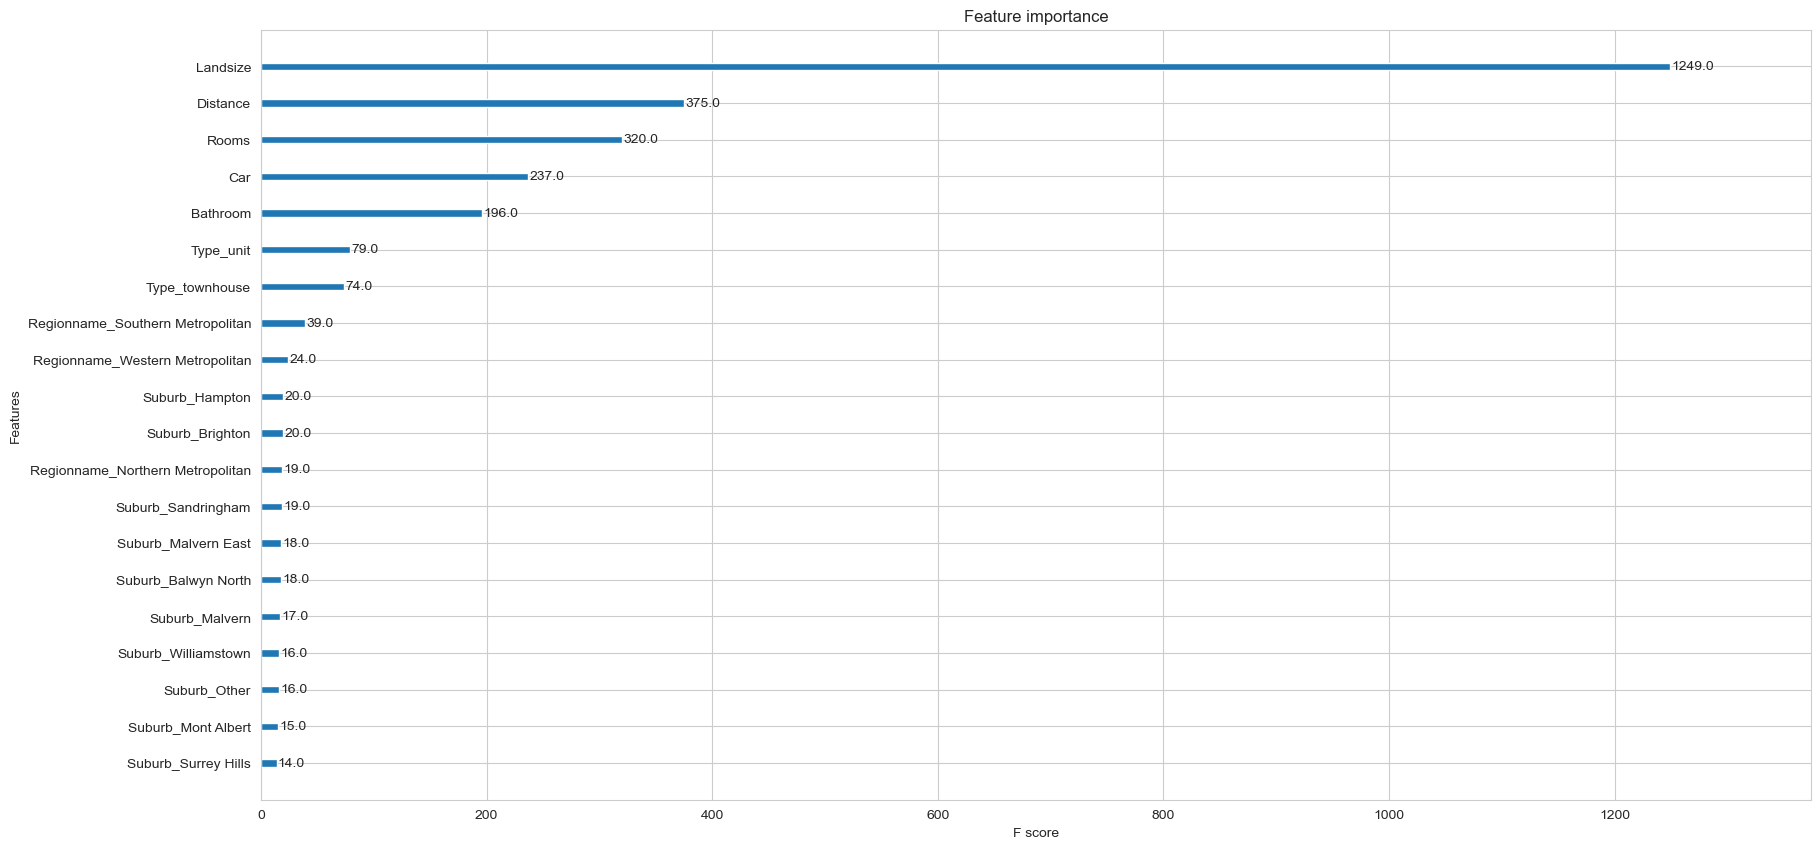

In [97]:
xgb.plot_importance(xgb_model, max_num_features=20)
plt.show()

In [ ]:
""""
#not working
def predict_price(rooms, distance, bathroom, car, landsize, suburb, property_type, region_name):
    # Find indices of the categorical features
    suburb_index = np.where(X.columns == f"Suburb_{suburb}")[0][0]
    property_type_index = np.where(X.columns == f"Type_{property_type}")[0][0]
    region_name_index = np.where(X.columns == f"Regionname_{region_name}")[0][0]

    # Create an array of zeros with the same length as the input features
    x = np.zeros(len(X.columns))

    # Update the continuous features
    x[0] = rooms
    x[1] = distance
    x[2] = bathroom
    x[3] = car
    x[4] = landsize

    # Update the categorical features
    if suburb_index >= 0:
        x[suburb_index] = 1
    if property_type_index >= 0:
        x[property_type_index] = 1
    if region_name_index >= 0:
        x[region_name_index] = 1

    # Return the predicted price using the XGBoost model
    return xgb_model.predict([x])[0]
""""

In [ ]:
""""
#not working
predict_price(3, 2.5, 2, 2, 2000, 'Yarraville', 'townhouse', 'Western Metropolitan')
""""""

In [109]:
X.columns

Index(['Rooms', 'Distance', 'Bathroom', 'Car', 'Landsize', 'Suburb_Aberfeldie',
       'Suburb_Airport West', 'Suburb_Albion', 'Suburb_Alphington',
       'Suburb_Altona',
       ...
       'Suburb_Yarraville', 'Type_townhouse', 'Type_unit',
       'Regionname_Eastern Victoria', 'Regionname_Northern Metropolitan',
       'Regionname_Northern Victoria', 'Regionname_South-Eastern Metropolitan',
       'Regionname_Southern Metropolitan', 'Regionname_Western Metropolitan',
       'Regionname_Western Victoria'],
      dtype='object', length=211)

In [112]:
feature_names = xgb_model.get_booster().feature_names
len(feature_names)

211

In [107]:
""""
checking if the one-hot encoding worked (Type sholuld be one less as house has been dropped)
type_columns = X.columns[X.columns.str.startswith('Type_')]
print(type_columns)

Index(['Type_townhouse', 'Type_unit'], dtype='object')


In [113]:
import pickle
with open('melbourne_house_price_prediciton_model.pickle','wb') as f:
    pickle.dump(xgb_model,f)

In [114]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json", "w") as f:
    f.write(json.dumps(columns))